# EngiTuto

This is a basic tutorial showing how to use EngiBench and interact with problems.

Author: Florian Felten <ffelten@mavt.ethz.ch>

In [1]:
!pip install -e ".[all]"

Obtaining file:///Users/ffelte/Documents/EngiBench
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Cloning https://github.com/mdolab/pyoptsparse to /private/var/folders/fw/69hmbxm946l1xycg8w29nw0800l9gd/T/pip-install-06yma624/pyoptsparse_b37e0bda2a4d4bbcad4ddb139e6ebed4
  Running command git clone --filter=blob:none --quiet https://github.com/mdolab/pyoptsparse /private/var/folders/fw/69hmbxm946l1xycg8w29nw0800l9gd/T/pip-install-06yma624/pyoptsparse_b37e0bda2a4d4bbcad4ddb139e6ebed4
  Resolved https://github.com/mdolab/pyoptsparse to commit f66e9fbd6712dbb941794698cf87fc053c8a7986
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Building editable for engibench (pyproject.toml) ... done
  Created wheel for engibench: filename=engibench-0.0.1-0

## Step 1: Instantiate a Problem

Let us see the 2D Airfoil problem

In [2]:
from engibench.problems.beams2d.v0 import Beams2D

In [3]:
problem = Beams2D()
problem.reset(99)

## Step 2: Inspect the Problem

### 2.1: Representation, Objectives, Boundary Conditions
The output just below means our beam is represented by 5000 pixels in `[0, 1]`. They are later reshaped as `(100, 50)`.

In [4]:
problem.design_space

Box(0.0, 1.0, (5000,), float32)

In [5]:
problem.possible_objectives

(('c', 'minimize'),)

In [6]:
problem.boundary_conditions

frozenset({('ft', 1),
           ('max_iter', 100),
           ('nelx', 100),
           ('nely', 50),
           ('overhang_constraint', False),
           ('penal', 3.0),
           ('rmin', 2.0),
           ('volfrac', 0.35)})

### 2.2 Data
We can directly access [the dataset linked to the problem](https://huggingface.co/datasets/IDEALLab/beams_2d_v0) doing the following:

In [7]:
problem.dataset

DatasetDict({
    train: Dataset({
        features: ['xPrint', 'nelx', 'nely', 'volfrac', 'penal', 'rmin', 'ft', 'max_iter', 'overhang_constraint', 'compliance'],
        num_rows: 950
    })
    val: Dataset({
        features: ['xPrint', 'nelx', 'nely', 'volfrac', 'penal', 'rmin', 'ft', 'max_iter', 'overhang_constraint', 'compliance'],
        num_rows: 178
    })
    test: Dataset({
        features: ['xPrint', 'nelx', 'nely', 'volfrac', 'penal', 'rmin', 'ft', 'max_iter', 'overhang_constraint', 'compliance'],
        num_rows: 60
    })
})

## Step 3: Creating a Design and Launching the Simulator
While you usually would generate a design based on a generative or surrogate mode, we here show how to play with a rather random one.

In [8]:
my_design, idx = problem.random_design()
my_design

array([0.77761949, 0.3267569 , 0.32889126, ..., 0.95305609, 1.00250589,
       1.        ])

You can also render designs to see what they look like.

ValueError: cannot reshape array of size 1250 into shape (100,50)

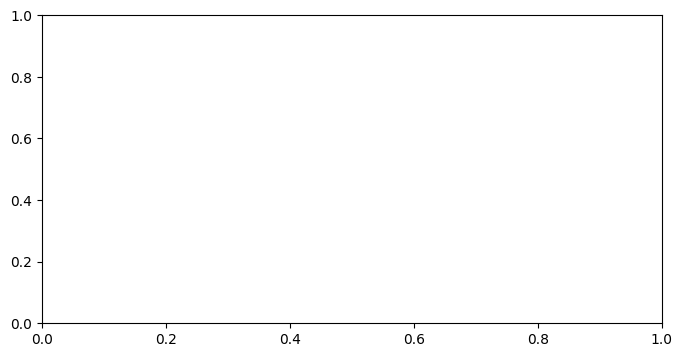

In [9]:
problem.render(my_design)

Finally, you can:
- Simulate a design to get its objective values with `objs = problem.simulate(my_design)`
- Optimize a given design with `optimal_design, objs = problem.optimize(my_design)`

In [ ]:
problem.simulate(my_design)

In [ ]:
opt_design, opt_history = problem.optimize(my_design)
opt_history[-1]

Now let's see how different is the optimal design from our random design above.

In [ ]:
problem.render(opt_design)